In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [4]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [5]:
print(gdp_df.shape)
print(gdp_df.info())

(7176, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB
None


Answer--There are 4 colums.  They are Country or Area,  Year, Value, and Value Footnotes.

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
gdp_df = gdp_df.drop("Value Footnotes", axis=1)

gdp_df = gdp_df.rename(columns={"Country or Area": "Country"})

gdp_df = gdp_df.rename(columns={"Value":"GDP_Per_Capita"})

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [7]:
print(gdp_df["Year"].min())
print(gdp_df["Year"].max())
print(gdp_df.sort_values("Country"))
print(gdp_df.groupby("Country")["Year"].count()<31)
gdp_missing_years = gdp_df.groupby("Country")["Year"].count()<31
print(gdp_missing_years[gdp_missing_years==True])
print(gdp_missing_years[gdp_missing_years==False].count())
print(gdp_missing_years[gdp_missing_years==True].count())


1990
2020
          Country  Year  GDP_Per_Capita
0     Afghanistan  2020     1970.560169
18    Afghanistan  2002     1189.784668
17    Afghanistan  2003     1235.810063
15    Afghanistan  2005     1286.793659
14    Afghanistan  2006     1315.789117
...           ...   ...             ...
7146     Zimbabwe  2019     2310.634802
7145     Zimbabwe  2020     2134.555461
7174     Zimbabwe  1991     2733.696626
7159     Zimbabwe  2006     1781.474597
7175     Zimbabwe  1990     2652.129209

[7176 rows x 3 columns]
Country
Afghanistan                     True
Africa Eastern and Southern    False
Africa Western and Central     False
Albania                        False
Algeria                        False
                               ...  
Vietnam                        False
West Bank and Gaza              True
World                          False
Zambia                         False
Zimbabwe                       False
Name: Year, Length: 242, dtype: bool
Country
Afghanistan              

Answer--There are 205 countries with all 31 years, and there are 37 countries with missing years. The ones with missing years tended to have major unrest or wars during the time.

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

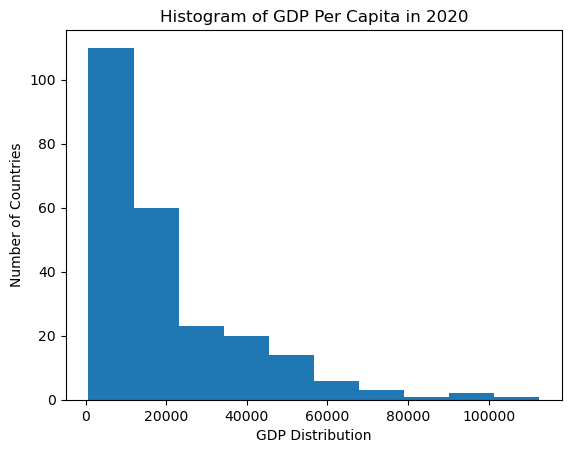

In [8]:
filter_gdp_2020 = gdp_df.loc[gdp_df["Year"] ==2020]
gdp_2020 = filter_gdp_2020[["GDP_Per_Capita"]]
plt.hist(gdp_2020)
plt.xlabel("GDP Distribution")
plt.ylabel("Number of Countries")
plt.title("Histogram of GDP Per Capita in 2020")
plt.show()

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

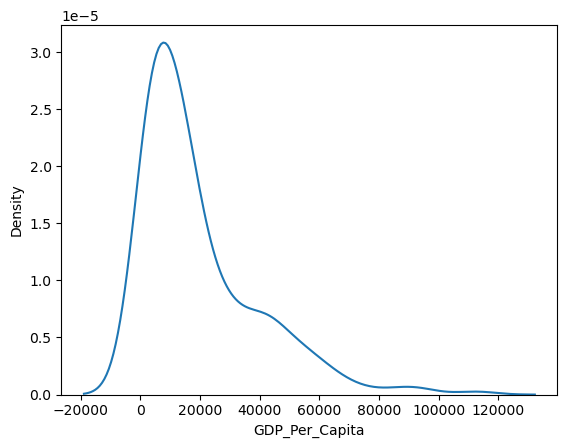

In [9]:
sns.kdeplot(gdp_2020["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

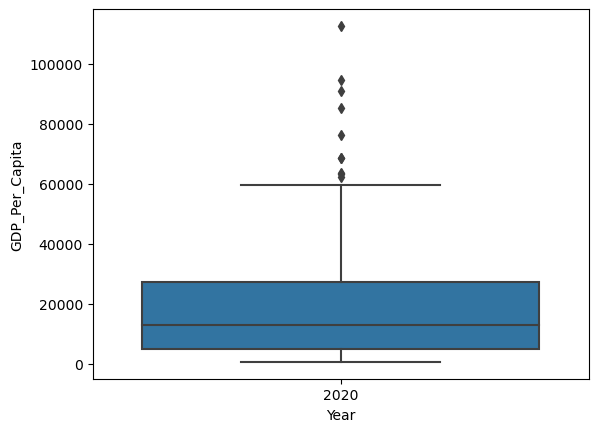

In [10]:
filter_gdp_2020 = gdp_df.loc[gdp_df["Year"] ==2020]
gdp_country_2020 = filter_gdp_2020[["Country","GDP_Per_Capita","Year"]]
sns.boxplot(x=gdp_country_2020["Year"],y=gdp_country_2020["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

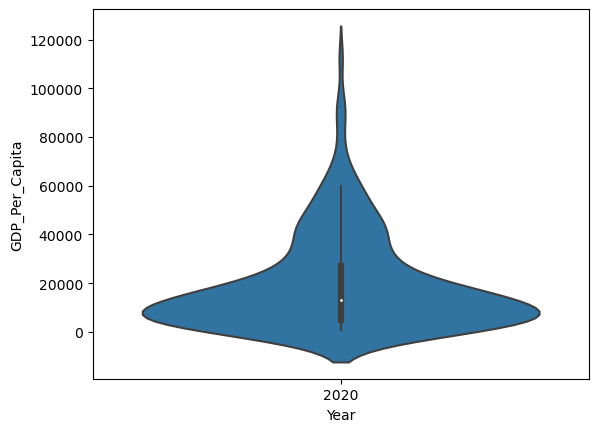

In [11]:
sns.violinplot(x=gdp_country_2020["Year"],y=gdp_country_2020["GDP_Per_Capita"])

Answer--The Histogram and Density Plot show easy to follow distributions.  The Boxplot and Violin plot do not without manually breaking down the data into smaller chunks.

9. What was the median GDP per capita value in 2020?

In [12]:
print(gdp_2020.describe())
gdp2020_v = gdp_2020["GDP_Per_Capita"]
gdp_median = np.median(gdp2020_v)
print(gdp_median)
print(np.median(gdp_2020["GDP_Per_Capita"]))

       GDP_Per_Capita
count      240.000000
mean     19496.881712
std      19586.817493
min        731.064074
25%       4945.083068
50%      12908.937406
75%      27196.648661
max     112557.309472
12908.9374056206
12908.9374056206


Answer--It would be 12908.937406

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

A boxplot

A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)

A scatterplot

A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

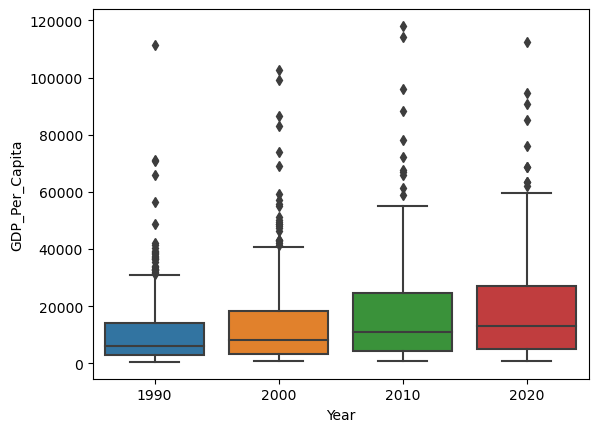

In [13]:
gdp_decades_filter = gdp_df.loc[gdp_df["Year"].isin([1990,2000,2010,2020])]
gdp_decades = gdp_decades_filter[["GDP_Per_Capita","Year"]]
sns.boxplot(x=gdp_decades["Year"],y=gdp_decades["GDP_Per_Capita"])

It looks like the majority of GDP Per Capita has gone up with each decade, even if the outerliers have not.

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

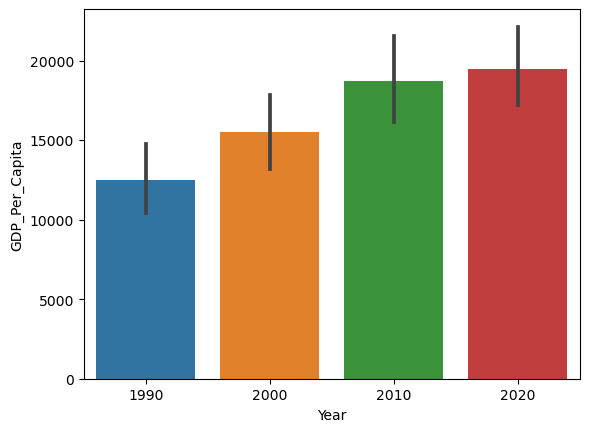

In [14]:
sns.barplot(x="Year",y="GDP_Per_Capita", data=gdp_decades)

The GDP Per Capita has increased each decade.

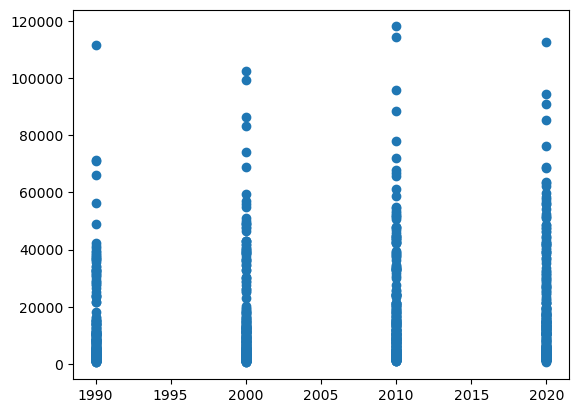

In [15]:
plt.scatter(x="Year",y="GDP_Per_Capita", data=gdp_decades)
plt.show()

In this one, GDP concentration has gone up each decade.

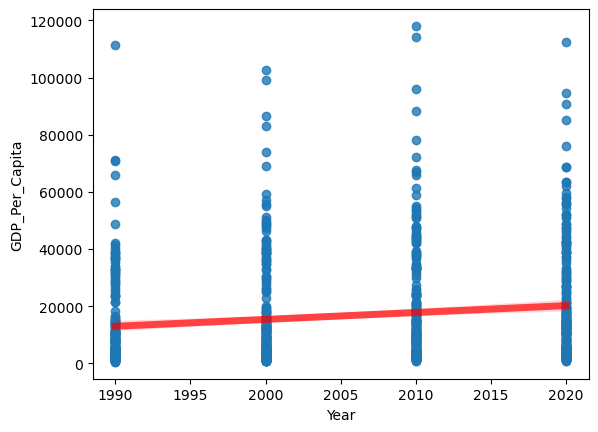

In [16]:
sns.regplot(x="Year", y="GDP_Per_Capita", data=gdp_decades, line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

In this one, the GDP Concentration and the trendline have gone up each decade.

11. Which country was the first to have a GDP per capita greater than $100,000?

In [17]:
gdp_100k = gdp_df[gdp_df["GDP_Per_Capita"] >= 100000]
print(gdp_100k.sort_values(by=["Year","Country"],ascending=[True,True]).head())

                   Country  Year  GDP_Per_Capita
6838  United Arab Emirates  1990   111454.055665
6837  United Arab Emirates  1991   106103.552655
6836  United Arab Emirates  1992   103470.924576
6834  United Arab Emirates  1994   100213.156226
6833  United Arab Emirates  1995   101570.992100


The first country to hit 100,000 was the UAE in 1990. They had 111,454.055665

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [18]:
print(gdp_country_2020.sort_values(by="GDP_Per_Capita", ascending=False).head())

         Country  GDP_Per_Capita  Year
3882  Luxembourg   112557.309472  2020
5720   Singapore    94505.636160  2020
3071     Ireland    90789.221024  2020
5381       Qatar    85290.450430  2020
639      Bermuda    76105.138057  2020


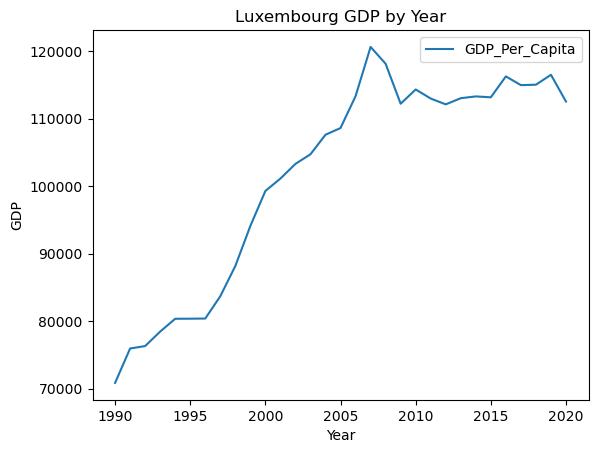

In [19]:
gdp_lux = gdp_df[gdp_df["Country"] == "Luxembourg"]
gdp_lux.plot(x="Year",y="GDP_Per_Capita")

plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("Luxembourg GDP by Year")

plt.show()

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [20]:
print(gdp_country_2020.sort_values(by="GDP_Per_Capita", ascending=True).head())

                       Country  GDP_Per_Capita  Year
914                    Burundi      731.064074  2020
1136  Central African Republic      937.856470  2020
1524           Dem. Rep. Congo     1082.445242  2020
5871                   Somalia     1180.965971  2020
4750                     Niger     1221.269930  2020


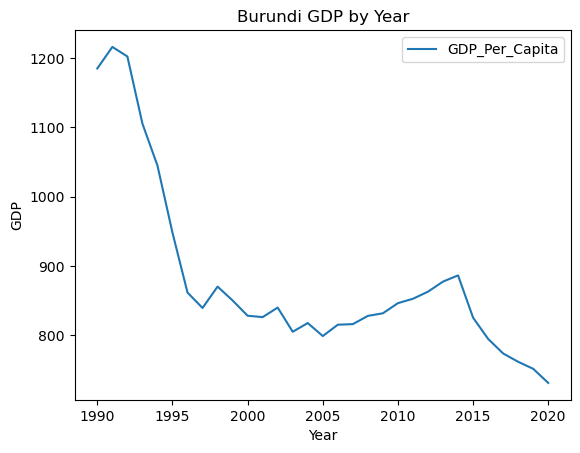

In [21]:
gdp_bur = gdp_df[gdp_df["Country"] == "Burundi"]
gdp_bur.plot(x="Year",y="GDP_Per_Capita")

plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("Burundi GDP by Year")

plt.show()

14. Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [27]:
internet_df = pd.read_csv('../data/internet_use.csv',on_bad_lines='skip',skipfooter=181,engine='python')

In [28]:
print(internet_df.shape)
print(internet_df.info())
print(internet_df.head())
print(internet_df.tail())

(4495, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB
None
  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN
     Country or Area  Year     Value  Value Footnotes
4490        Zimbabwe  1997  0.033080              NaN
4491        Zimbabwe  1996  0.016790              NaN
4492        Zimbabwe  1995  0.007684              NaN
4493        Zimba

15. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [29]:
internet_df = internet_df.drop("Value Footnotes", axis=1)

internet_df = internet_df.rename(columns={"Country or Area": "Country"})

gdp_df = gdp_df.rename(columns={"Value":"Internet_Users_Pct"})